# Heart Disease data base and simple analysis

- Import libraries needed;

In [2]:
import math
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Import the heart disease data from Cleveland;
- Check the head of the data base;

In [3]:
heart_disease = pd.read_csv("cleveland.csv")            # read the data

heart_disease.head()                                    # check the data base

,age,sex,chest_pain,blood_ps,chol,fblood_sugar,restecg,max_ha,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


- Complete attribute documentation:
    - age: age in years
    - sex: sex (1 = male; 0 = female)
    - cp: chest pain type
        - Value 1: typical angina
        - Value 2: atypical angina
        - Value 3: non-anginal pain
        - Value 4: asymptomatic
    - blood_ps: resting blood pressure (in mmHg on admission to the hospital)
    - chol: serum cholestoral in mg/dl
    - fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - restecg: resting electrocardiographic results
        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - thalach: maximum heart rate achieved
    - exang: exercise induced angina (1 = yes; 0 = no)
     - oldpeak = ST depression induced by exercise relative to rest
    - slope: the slope of the peak exercise ST segment
        - Value 1: upsloping
        - Value 2: flat
        - Value 3: downsloping
    - ca: number of major vessels (0-3) colored by flourosopy
    - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    - num: diagnosis of heart disease (angiographic disease status)
        - Value 0: < 50% diameter narrowing
        - Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

- Now create a new column to calculate the age_group and divide the individuals by age;

In [4]:
#heart_disease['age'].value_counts()
heart_disease['age_group'] = heart_disease['age']           # create a new column copying the age column
heart_disease.head()                                        # check the data base

,age,sex,chest_pain,blood_ps,chol,fblood_sugar,restecg,max_ha,exang,oldpeak,slope,ca,thal,num,age_group
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,63
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,67
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,67
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,37
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,41


- Let's rearrange the columns from our data frame;

In [5]:
cols = ['age', 'age_group', 'sex', 'chest_pain', 'blood_ps', 'chol', 'fblood_sugar', 'restecg', 'max_ha', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_disease = heart_disease[cols]
heart_disease.head()

,age,age_group,sex,chest_pain,blood_ps,chol,fblood_sugar,restecg,max_ha,exang,oldpeak,slope,ca,thal,num
0,63,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


- Calculate the number of classes and class amplitude;

In [6]:
age_k_count = heart_disease['age_group'].value_counts() # variable to receive the data counted and collated
age_k_count = age_k_count.size                          # variable receive how many elements the data have


if age_k_count > 50:                                    # compare whether the class number it's higher than 50
    age_k = 1 + (3.322 * np.log(age_k_count))           # if higher than 50 execute this function
else:                                                   # if lower or equal than 50 execute just the square root
    age_k = np.sqrt(age_k_count)

if age_k > round(age_k):                                # operation to round up the class quantity
    age_k = round(age_k) + 1                            #
else:                                                   #   
    age_k = round(age_k)                                #

max_age = heart_disease['age'].max()
min_age = heart_disease['age'].min()

class_amp_h = (max_age - min_age) / age_k               # calculate the class amplitude // maior_valor-menor_valor / num_class

if class_amp_h > round(class_amp_h):                     # operation to round up the class amplitude
    class_amp_h = round(class_amp_h) + 1                 #           
else:                                                    #
    class_amp_h = round(class_amp_h)                     #

age_group_boun = np.zeros(shape=age_k)                          # Create an aux array with the classes age limits

for i in range(age_k):                                     # Arrange and calculate the ages to each class
    if i == 0:                                             # when i equals 0, take the class amplitude plus the minimal age
        age_group_boun[0] = min_age + class_amp_h               
    else:
        age_group_boun[i] = age_group_boun[i-1] + class_amp_h        # when i not 0, take the previous age from age_group array plus the class amplitude

print(age_group_boun)                                           # check the classes boundaries


[36. 43. 50. 57. 64. 71. 78.]


- Now let's organize separate the age group of each individual, for this case:
    - 29 |- 36
    - 36 |- 43
    - 43 |- 50
    - 50 |- 57
    - 57 |- 64
    - 64 |- 71
    - 71 |- 78

In [7]:
for i in range(age_k):                               # i variable will check each boundary on the age_group class
    # IFs just for the disease data base
    if i == 0:
        aux = str(min_age) + " |- " + str(int(age_group_boun[i]))
    else:
        aux = str(int(age_group_boun[i-1])) + " |- " + str(int(age_group_boun[i]))

    for j in range(len(heart_disease['age_group'])):                        # j variable will go through all the database
        if type(heart_disease.loc[j,'age_group']) != str:                   # check if the age_group was updated to the group str or if it's still the age number
            if i == 0:                                                      # when i=0 we don't have a lower boundary, so just check whether the age it's less than the first upper boundary
                if heart_disease.loc[j,'age_group'] < age_group_boun[i]:    # check if the current db age it's lower than the first boundary
                    heart_disease.loc[j,'age_group'] = aux                  # if yes, update the position with the age_group str
            else:                                                           # if i != 0, need to check lower and upper boundaries to match the age_group
                if (heart_disease.loc[j,'age_group'] < age_group_boun[i]) and (heart_disease.loc[j,'age_group'] >= age_group_boun[i-1]): 
                    heart_disease.loc[j,'age_group'] = aux                  # if yes, update the position with the age_group str

aux = pd.DataFrame(np.zeros(shape=(age_k,2)))  # use aux variable to create a dataframe to hold some transitional information
aux = heart_disease.groupby(['age_group'])['age'].count()  # receive the count for each age_group grouped

- Now let's create our frequency table part by part:

In [8]:
freq_table= pd.DataFrame(0, index=np.arange(0, age_k), columns=['group','Xi','fi','fri','fri%','fia','fria','fria%'])  # create a dataset to organize the frequency table
freq_table['group'] = aux.index                         # from auxiliary variable get the index, which is the age_group

# calculate the class medium point
for i in range(age_k):          # for to go through all the rows from the freq_table     
    if i == 0:                  # when i=0 we don't have a lower boundary, so just check whether the age it's less than the first upper boundary
        freq_table.loc[i,'Xi'] = round((age_group_boun[i]+min_age) / 2)
    else:                       # if i != 0, need to calculate between lower and upper boundaries from the age_group
        freq_table.loc[i,'Xi'] = round((age_group_boun[i]+age_group_boun[i-1]) / 2)

# get the counted values from auxiliary variable
for i in range(age_k):          # for to go through all the rows from the freq_table
    freq_table.loc[i,'fi'] = aux.iloc[i]    # get from auxiliary variable the values counted from each age_group

# calculate the relative frequency to each age group
for i in range(age_k):          # for to go through all the rows from the freq_table
    freq_table.loc[i,'fri'] = round((freq_table.loc[i,'fi']/heart_disease['age'].size),4)      # calculate the relative frequency (fi/n)

# calculate the percentage relative frequency to each age group
for i in range(age_k):          # for to go through all the rows from the freq_table
    freq_table.loc[i,'fri%'] = round(100*freq_table.loc[i,'fri'],4)                           # calculate the percentage relative frequency (fi/n)*100

# calculate the acumulated frequency to each age group
for i in range(age_k):          # for to go through all the rows from the freq_table
    if i == 0:                  # when i = 0, it's the first row, so it's just the first number itself
        freq_table.loc[i,'fia'] = aux.iloc[i]
    else:                       # when i != 0, gets the previous value plus the one for that group
        freq_table.loc[i,'fia'] = aux.iloc[i] + freq_table.loc[i-1,'fia']

# calculate the relative acumulated frequency to each age group
for i in range(age_k):          # for to go through all the rows from the freq_table
    freq_table.loc[i,'fria'] = round((freq_table.loc[i,'fia']/heart_disease['age'].size),4)  # calculate the acumulated relative frequency (fria/n)

# calculate the percentage relative acumulated frequency to each age group
for i in range(age_k):          # for to go through all the rows from the freq_table
    freq_table.loc[i,'fria%'] = round(100*freq_table.loc[i,'fria'],4)                       # calculate the acumulated relative frequency (fria/n)*100

freq_table  # present the frequency table

,group,Xi,fi,fri,fri%,fia,fria,fria%
0,29 |- 36,32,7,0.0231,2.31,7,0.0231,2.31
1,36 |- 43,40,29,0.0957,9.57,36,0.1188,11.88
2,43 |- 50,46,51,0.1683,16.83,87,0.2871,28.71
3,50 |- 57,54,75,0.2475,24.75,162,0.5347,53.47
4,57 |- 64,60,90,0.2970,29.70,252,0.8317,83.17
5,64 |- 71,68,45,0.1485,14.85,297,0.9802,98.02
6,71 |- 78,74,6,0.0198,1.98,303,1.0000,100.00


- Some descritives measurements from the data that we have:

In [9]:
round(heart_disease.describe(),2)    # function that gets some descritives measurements

,age,sex,chest_pain,blood_ps,chol,fblood_sugar,restecg,max_ha,exang,oldpeak,slope,num
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.94
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,4.00


- The median and the mode values

In [10]:
print("Median value: " + str(heart_disease['age'].median()))       # function that gets only the median value, showed above as 50%
mode = stats.mode(heart_disease['age'])    # function that gets the mode value
print("Mode: " + str(mode[0]))


Median value: 56.0
Mode: [58]


- Now let's find the quartiles from the age data:

In [11]:
agehd_sorted = heart_disease['age'].sort_values()          # sorting values in crescent order

quartile1_hd = agehd_sorted.iloc[round((heart_disease['age'].size)/4)]   # get the 1st quartile value
quartile2_hd = agehd_sorted.iloc[round((heart_disease['age'].size)/2)]   # get the 2nd quartile value, same as median value
quartile3_hd = agehd_sorted.iloc[round((heart_disease['age'].size)*3/4)] # get the 3rd quartile value

print("Q1 = " + str(quartile1_hd) + "\n" + "Q2 = " + str(quartile2_hd) + "\n" + "Q3 = " + str(quartile3_hd)) # shows the quartiles number

Q1 = 48
Q2 = 56
Q3 = 61


- We should also find the interquartile amplitude, which is the subtraction between the number found on Q3 and Q1. It's used as an alternative dispersion measure for standard deviation and it represents the 50% data observerd.

In [12]:
IQA = quartile3_hd - quartile1_hd  # Q3 - Q1 to find InterQuartile Amplitude
print(IQA)

13


- Age histogram and boxplot:

<AxesSubplot:xlabel='age', ylabel='Count'>

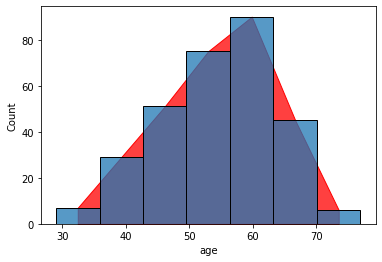

In [13]:
sns.histplot(heart_disease['age'], bins=7, element='poly', color='red')     # Age Polygon histogram in red
sns.histplot(heart_disease['age'], bins=7)                                  # Age Histogram in blue

Max Age: 77
Min Age: 29


<AxesSubplot:>

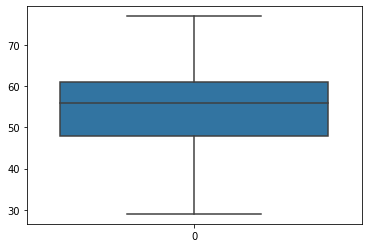

In [44]:
print("Max Age: " + str(max_age) +"\n"+"Min Age: " + str(min_age))
sns.boxplot(data=(heart_disease.age))       #  Age boxplot

- Blood preasure histogram and boxplot:

<AxesSubplot:xlabel='blood_ps', ylabel='Count'>

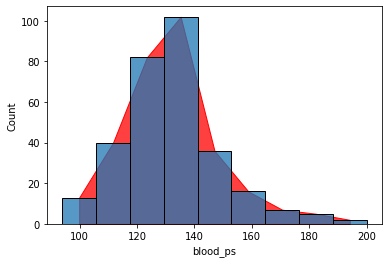

In [15]:
sns.histplot(heart_disease['blood_ps'], bins=9, element='poly', color='red')
sns.histplot(heart_disease['blood_ps'], bins=9)

<AxesSubplot:>

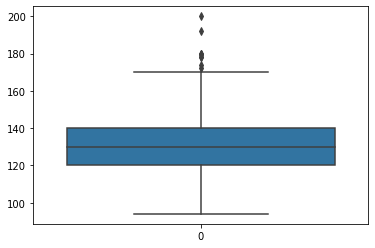

In [16]:
sns.boxplot(data=(heart_disease.blood_ps))

- 2 charts 

<AxesSubplot:xlabel='age', ylabel='chol'>

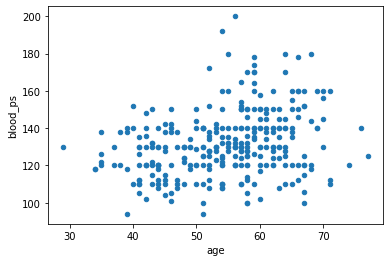

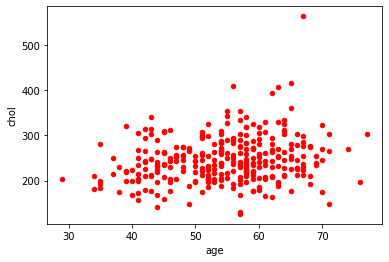

In [17]:
heart_disease.plot(kind='scatter', x='age', y='blood_ps')
heart_disease.plot(kind='scatter', x='age', y='chol', color='red')

<AxesSubplot:xlabel='blood_ps', ylabel='chol'>

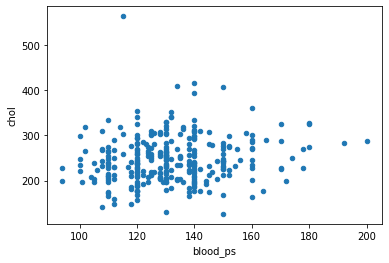

In [18]:
heart_disease.plot(kind='scatter', y='chol', x='blood_ps')

# Analise Bidimensional

In [46]:
age_cols = ['Sex_Age']      # age_cols are the columns for the new dataset that will be used to do the two-way analysis
for i in range(freq_table['group'].size):                   # for to build the new data set columns
    age_cols = np.append(age_cols, freq_table.iloc[i,0])    # this will add the columns name same as the age groups form the frequency table
age_cols = np.append(age_cols,['Total'])                    # Add a column at end to sum the row total
age_cols

array(['Sex_Age', '29 |- 36', '36 |- 43', '43 |- 50', '50 |- 57',
       '57 |- 64', '64 |- 71', '71 |- 78', 'Total'], dtype='<U8')

In [47]:
analise_bi = pd.DataFrame(columns = age_cols)               # Create the dataset to organize the dat.
analise_bi.loc[len(analise_bi.index)] = 0                   
analise_bi.loc[len(analise_bi.index)] = 0                   # Put zeros in each row/column
analise_bi.loc[len(analise_bi.index)] = 0
analise_bi.loc[0,'Sex_Age'] = 'Female'                      
analise_bi.loc[1,'Sex_Age'] = 'Male'                        # Add the rows index
analise_bi.loc[2,'Sex_Age'] = 'Total'


# Now let's build our two-way analysis table separated by age groups on the columns and the rows by sex
for i in range(1,len(analise_bi.columns)-1):                    # For to run throught the new dataset columns
    for j in range(heart_disease['age_group'].size):            # For to run throught the original dataset to check the individual age group and the sex
        if heart_disease.loc[j,'age_group'] == age_cols[i]:     # Check whether the individual belong to that age_group
            analise_bi.iloc[2,i] += 1                               # If yes, sum plus 1 to the number of total individuals from that age_group
            if heart_disease.loc[j,'sex'] == 0:                 # Check if the individual it's male or female and add to the row/column
                analise_bi.iloc[0,i] += 1                           # 0 means female
            else:
                analise_bi.iloc[1,i] += 1                           # 1 means male

for i in range(1,len(analise_bi.columns)-1):                    # this for it's to calculate the total individual numbers separated by row (Male/Female)
    analise_bi.loc[0,'Total'] += analise_bi.iloc[0,i]
    analise_bi.loc[1,'Total'] += analise_bi.iloc[1,i]
    analise_bi.loc[2,'Total'] += analise_bi.iloc[2,i]

In [48]:
analise_bi

,Sex_Age,29 |- 36,36 |- 43,43 |- 50,50 |- 57,57 |- 64,64 |- 71,71 |- 78,Total
0,Female,2,9,13,23,30,15,5,97
1,Male,5,20,38,52,60,30,1,206
2,Total,7,29,51,75,90,45,6,303


In [49]:
porc_analise_bi = analise_bi.copy()  # copy the dataset to do the percentage two-way analysis

for i in range(1,len(porc_analise_bi.columns)):     # for to calculate the percentage values to each row/column
    # The formula it's done by row "(male-female_age_group_qty / male-female_total) * 100"
    porc_analise_bi.iloc[0,i] = round(((porc_analise_bi.iloc[0,i] / porc_analise_bi.loc[0,'Total']) * 100),2)
    porc_analise_bi.iloc[1,i] = round(((porc_analise_bi.iloc[1,i] / porc_analise_bi.loc[1,'Total']) * 100),2)
    porc_analise_bi.iloc[2,i] = round(((porc_analise_bi.iloc[2,i] / porc_analise_bi.loc[2,'Total']) * 100),2)


In [50]:
porc_analise_bi

,Sex_Age,29 |- 36,36 |- 43,43 |- 50,50 |- 57,57 |- 64,64 |- 71,71 |- 78,Total
0,Female,2.06,9.28,13.40,23.71,30.93,15.46,5.15,100
1,Male,2.43,9.71,18.45,25.24,29.13,14.56,0.49,100
2,Total,2.31,9.57,16.83,24.75,29.70,14.85,1.98,100


# Associacao entre variaveis

In [23]:
val_esperado = analise_bi.copy()    # Copy the dataset to seek the 

for i in range(1,len(val_esperado.columns)-1):
    val_esperado.iloc[0,i] = val_esperado.loc[0,'Total'] * ((porc_analise_bi.iloc[2,i]) / 100)
    val_esperado.iloc[1,i] = val_esperado.loc[1,'Total'] * ((porc_analise_bi.iloc[2,i]) / 100)

In [24]:
desvio_ob_esp = val_esperado.copy()
desvio_ob_esp = desvio_ob_esp.drop(2)
del desvio_ob_esp['Total']
val_esperado

,Sex_Age,29 |- 36,36 |- 43,43 |- 50,50 |- 57,57 |- 64,64 |- 71,71 |- 78,Total
0,Female,2.240924,9.283828,16.326733,24.009901,28.811881,14.405941,1.920792,97
1,Male,4.759076,19.716172,34.673267,50.990099,61.188119,30.594059,4.079208,206
2,Total,7.000000,29.000000,51.000000,75.000000,90.000000,45.000000,6.000000,303


In [25]:
for i in range(1,len(desvio_ob_esp.columns)):
    for j in range(len(desvio_ob_esp.index)):
        desvio_ob_esp.iloc[j,i] = analise_bi.iloc[j,i] - val_esperado.iloc[j,i]

In [26]:
desvio_ob_esp

,Sex_Age,29 |- 36,36 |- 43,43 |- 50,50 |- 57,57 |- 64,64 |- 71,71 |- 78
0,Female,-0.240924,-0.283828,-3.326733,-1.009901,1.188119,0.594059,3.079208
1,Male,0.240924,0.283828,3.326733,1.009901,-1.188119,-0.594059,-3.079208


In [27]:
residuo_relativo = desvio_ob_esp.copy()

for i in range(1,len(residuo_relativo.columns)):
    residuo_relativo.iloc[0,i] = pow(residuo_relativo.iloc[0,i],2) / val_esperado.iloc[0,i]
    residuo_relativo.iloc[1,i] = pow(residuo_relativo.iloc[1,i],2) / val_esperado.iloc[1,i]

In [28]:
residuo_relativo

,Sex_Age,29 |- 36,36 |- 43,43 |- 50,50 |- 57,57 |- 64,64 |- 71,71 |- 78
0,Female,0.025902,0.008677,0.677855,0.042478,0.048995,0.024497,4.936256
1,Male,0.012197,0.004086,0.319184,0.020002,0.023070,0.011535,2.324354


In [29]:
chi_quadrado = 0
for i in range(len(residuo_relativo.index)):    
    for j in range(1,len(residuo_relativo.columns)):
        chi_quadrado += residuo_relativo.iloc[i,j]

chi_quadrado

8.47908736495126

In [30]:
coef_cont_C = math.sqrt(chi_quadrado / (chi_quadrado+analise_bi.loc[2,'Total']))
coef_cont_C

0.1649909443397342

In [31]:
coef_cont_T = math.sqrt((chi_quadrado/analise_bi.loc[2,'Total'])/((len(residuo_relativo.index)-1)*(len(residuo_relativo.columns)-1)))
coef_cont_T

0.0632272394768126

## Correlacao

In [32]:
corr_table = pd.DataFrame(columns=['age','blood_ps', 'x-x|','y-y|','zx','zy','zx*zy'])
corr_table['age']=heart_disease['age']
corr_table['blood_ps']=heart_disease['blood_ps']

In [33]:
age_mean = round(corr_table['age'].mean(),3)
blood_ps_mean = round(corr_table['blood_ps'].mean(),3)
age_std = round(corr_table['age'].std(),3)
blood_ps_std = round(corr_table['blood_ps'].std(),3)

In [34]:
for i in range (len(corr_table)):                                       ## Found the x - x_mean to each subject (age)
    corr_table.loc[i,'x-x|'] = corr_table.loc[i,'age'] - age_mean
    corr_table.loc[i,'zx'] = corr_table.loc[i,'x-x|'] / age_std

for i in range (len(corr_table)):                                       ## Found the y - y_mean to each subject (blood_ps)
    corr_table.loc[i,'y-y|'] = corr_table.loc[i,'blood_ps'] - blood_ps_mean
    corr_table.loc[i,'zy'] = corr_table.loc[i,'y-y|'] / blood_ps_std

for i in range (len(corr_table)):
    corr_table.loc[i,'zx*zy'] = corr_table.loc[i,'zx'] * corr_table.loc[i,'zy']


In [35]:
print("O coeficiente de correlação tem o valor de: " + str(round(corr_table['zx*zy'].sum()/len(corr_table),3)))

O coeficiente de correlação tem o valor de: 0.284


In [36]:
corr_table

,age,blood_ps,x-x|,y-y|,zx,zy,zx*zy
0,63,145,8.561,13.31,0.947118,0.75625,0.716258
1,67,160,12.561,28.31,1.389645,1.608523,2.235275
2,67,120,12.561,-11.69,1.389645,-0.664205,-0.923008
3,37,130,-17.439,-1.69,-1.929306,-0.096023,0.185257
4,41,130,-13.439,-1.69,-1.48678,-0.096023,0.142765
...,...,...,...,...,...,...,...
298,45,110,-9.439,-21.69,-1.044253,-1.232386,1.286923
299,68,144,13.561,12.31,1.500277,0.699432,1.049341
300,57,130,2.561,-1.69,0.283328,-0.096023,-0.027206
301,57,130,2.561,-1.69,0.283328,-0.096023,-0.027206


<AxesSubplot:xlabel='zx', ylabel='zy'>

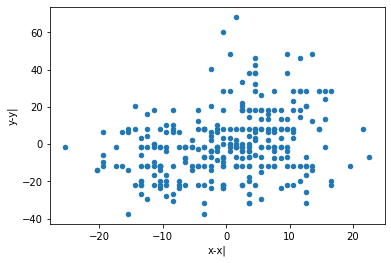

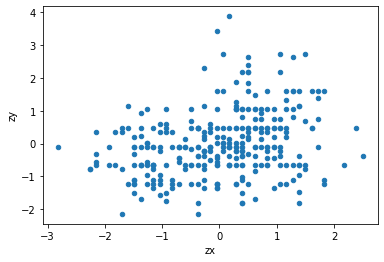

In [37]:
corr_table.plot(kind='scatter',x='x-x|',y='y-y|')
corr_table.plot(kind='scatter',x='zx',y='zy')

## Distribuicao de probabilidade

In [38]:
distr_prob = pd.DataFrame(columns=['blood_ps','fblood_sugar'])
distr_prob['blood_ps'] = heart_disease['blood_ps']
distr_prob['fblood_sugar'] = heart_disease['fblood_sugar']

In [39]:
distr_prob

,blood_ps,fblood_sugar
0,145,1
1,160,0
2,120,0
3,130,0
4,130,0
...,...,...
298,110,0
299,144,1
300,130,0
301,130,0


In [40]:
for i in range (len(distr_prob)):
    if distr_prob.loc[i,'blood_ps'] > 129:
        distr_prob.loc[i,'blood_ps'] = 1
    else:
        distr_prob.loc[i,'blood_ps'] = 0

In [41]:
distr_prob.groupby(['blood_ps','fblood_sugar']).size()

blood_ps  fblood_sugar
0         0               121
          1                14
1         0               137
          1                31
dtype: int64

In [42]:
distr_prob.groupby(['blood_ps']).size()

blood_ps
0    135
1    168
dtype: int64

In [43]:
data = [[121,14,135],[137,31,168],[258,45,303]]
bi_distr_prob = pd.DataFrame(data, index=['n_blood_ps','h_blood_ps', 'total'],columns=['non_diab','diab','total'])
bi_distr_prob

,non_diab,diab,total
n_blood_ps,121,14,135
h_blood_ps,137,31,168
total,258,45,303
